In [7]:
import numpy as np
import os
from collections import defaultdict
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

In [54]:
frame = pd.DataFrame(columns=["points","rate","typ","ms"])

for file in os.listdir("performance"):
    if not file.startswith("performance"):
        continue
    with open("performance/" + file, "r") as f:
        _ = f.readline()
        point, rate = file.split('_')[1:3]
        for line in f.readlines():
            if line.startswith("compress"):
                comp_time = float(line.split(" ")[2])
                continue
            if line.startswith("transfer_compress"):
                comp_time += float(line.split(" ")[2])                
                continue
            if line.startswith("decompress"):
                comp_time += float(line.split(" ")[2])
                typ = 'compressed'
            if line.startswith("transfer_uncompress"):
                typ = 'no compression'
                comp_time = float(line.split(" ")[2])
            frame = pd.concat([frame,pd.DataFrame(data=[{'points':int(point),'rate':rate,'typ':typ,'ms':comp_time}])],ignore_index=True)                       
frame

,points,rate,typ,ms
0,40000000,16,compressed,26.455520
1,40000000,16,no compression,16.012600
2,40000000,16,compressed,12.451590
3,40000000,16,no compression,17.052800
4,40000000,16,compressed,12.456550
...,...,...,...,...
8795,1000000,32,no compression,0.498080
8796,1000000,32,compressed,0.851521
8797,1000000,32,no compression,0.562401
8798,1000000,32,compressed,0.852640


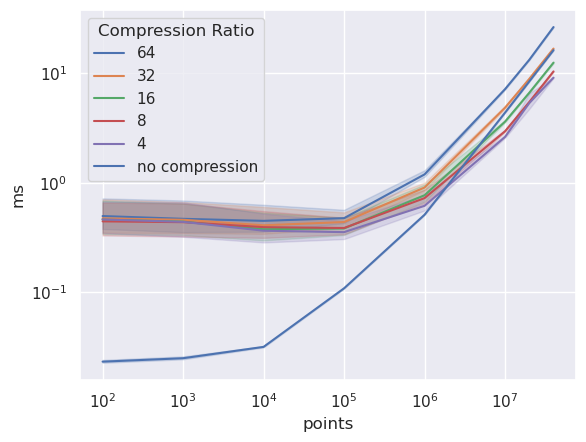

In [55]:
uncomp = frame.loc[frame["typ"] == 'no compression']   
cmp = frame.loc[frame["typ"] != 'no compression']   
sns.lineplot(x="points", y="ms", hue='rate', data = cmp, hue_order=['64','32','16','8','4'])
g = sns.lineplot(x="points", y="ms", hue='typ', data=uncomp, )
leg = g.axes.get_legend()
leg.set_title("Compression Ratio")
plt.xscale('log')
plt.yscale('log')